<a href="https://colab.research.google.com/github/christianbusalanan/Math-for-Machine-Learning-Linear-Algebra/blob/main/MO_IT125_Homework_Data_Preprocessing_of_Machine_Learning_Solution_Project_Dataset_BSIT_S3103_Busalanan%2C_C_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finmark Corporation
**Problem Statement**: FinMark Corporation has a wealth of data collected from various sources, including customer transactions, social media interactions, and demographic information. However, the company struggles to derive meaningful insights due to data overload and inconsistencies. The current customer segmentation strategies are outdated, and there is a lack of clarity on market trends and customer behaviors.

**Project Deliverables**: Over the next 12 weeks, the company wants you to develop a machine learning solution to address these challenges. The composition of the machine learning solution is as follows:
1. Exploratory Data Analysis (EDA) - explores the main characteristics of the collected data, identifies key patterns, and detects anomalies in the FinMark Corporation datasets.

2. Data Visualization -  discovers relationships between variables and identifies patterns and trends in the FinMark Corporation datasets.

3. Presentation of Machine Learning Solution Project - a presentation of your development process and findings.

## Customer Segments

In [122]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset
cust_demo= pd.read_csv('customer_demographics_contaminated.csv')
cust_demo.head(10)

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50,Female,Jessebury,High,2023-08-24
5,2de49c7c-32ae-4ba8-b058-622a090d7094,53,Female,Emilyville,Low,2022-02-13
6,89f7de44-e592-43c6-b033-bcbcf24088ba,NaN,Female,South Derekbury,High,2019-12-08
7,9f2128cd-2f2b-4f71-987c-29fd045021f0,NaN,Female,Lake Erin,Medium,2022-04-26
8,fbcd7128-ce04-4799-8c1c-722330507b96,NaN,Female,New Reginabury,NaN,2022-04-17
9,40f5a5dd-a46f-4a5e-8c0f-fe04389ddec8,NaN,Female,Mariaberg,High,2024-02-18


In [123]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   3200 non-null   object
 1   Age          2909 non-null   object
 2   Gender       3200 non-null   object
 3   Location     3200 non-null   object
 4   IncomeLevel  2897 non-null   object
 5   SignupDate   3200 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB


In [124]:
#Dropping duplicates
cust_demo.drop_duplicates(inplace=True)

# Cleaning Age Column
cust_demo['Age'] = pd.to_numeric(cust_demo['Age'], errors='coerce')
median_age = cust_demo['Age'].median()
cust_demo['Age'].fillna(median_age, inplace=True)
cust_demo['Age'] = cust_demo['Age'].astype(int)

# Cleaning the one row with the value '-1' as its age
cust_demo['Age']= cust_demo['Age'].replace(-1, median_age)

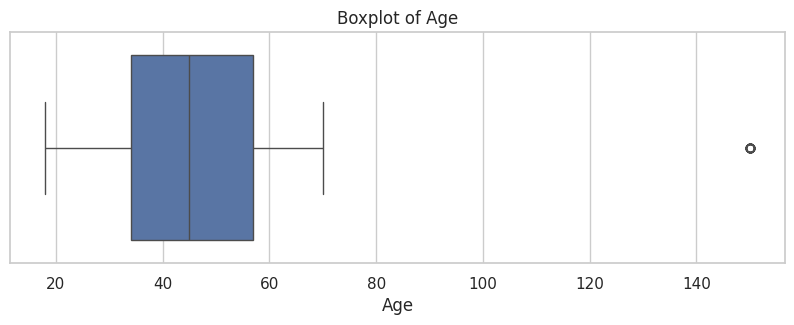

In [125]:
# Visualizing the Outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10,3))
sns.boxplot(data= cust_demo, x= 'Age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [126]:
#Replacing the outliers with the 95th percentile
percentile_95 = cust_demo['Age'].quantile(0.95)
cust_demo['Age'] = np.where(cust_demo['Age'] > percentile_95, percentile_95, cust_demo['Age'])

In [127]:
# Replacing missing values with 'Unknown'
cust_demo['IncomeLevel']= cust_demo['IncomeLevel'].fillna('Unknown')
cust_demo['IncomeLevel'].value_counts()

,count
IncomeLevel,
High,946
Low,923
Medium,869
Unknown,285


In [128]:
# Setting Signup Data to datetime datatype
cust_demo['SignupDate'] = pd.to_datetime(cust_demo['SignupDate'], format='mixed')

**Descriptive Statistics**

In [129]:
cust_demo.describe()

,Age,SignupDate
count,3023.000000,3023
mean,44.886867,2022-01-09 18:58:56.883890432
min,18.000000,2019-01-07 00:00:00
25%,34.000000,2020-09-22 00:00:00
50%,45.000000,2022-01-06 00:00:00
75%,57.000000,2023-04-30 12:00:00
max,68.000000,2024-12-01 00:00:00
std,14.539220,NaN


**Average Age per Gender**

In [130]:
cust_demo.groupby('Gender')['Age'].mean()

,Age
Gender,
Female,45.303665
Male,44.460870


**Countplot of each income level**

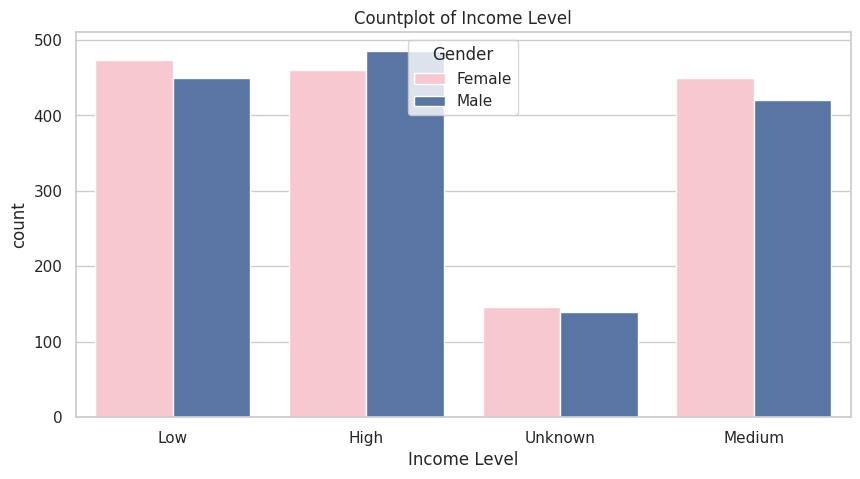

In [131]:
plt.figure(figsize= (10, 5))
sns.countplot(data= cust_demo, x= 'IncomeLevel', hue= 'Gender',  palette= {'Male': 'b', 'Female': 'pink'})
plt.title('Countplot of Income Level')
plt.xlabel('Income Level')
plt.show()

**Signup Trend Over Time**

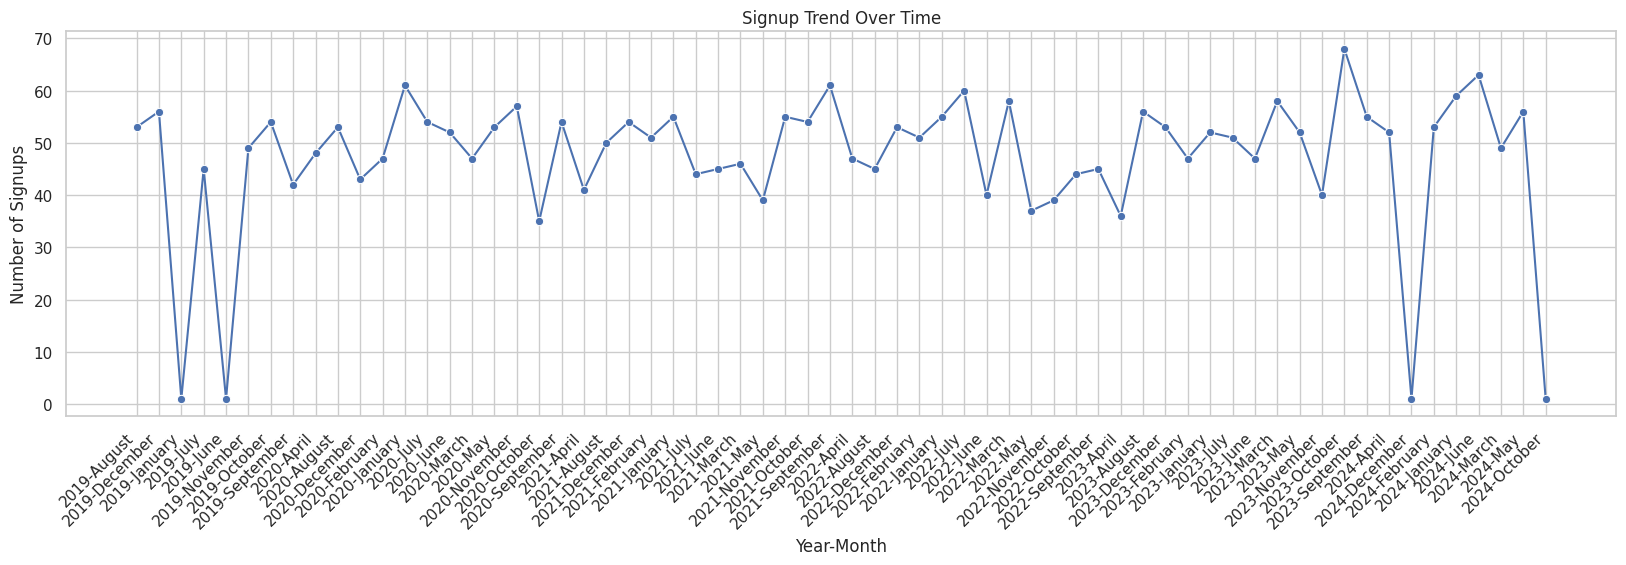

In [132]:
demo_copy= cust_demo.copy()
demo_copy['SignupYear'] = demo_copy['SignupDate'].dt.year
demo_copy['SignupMonth'] = demo_copy['SignupDate'].dt.month_name()
signup = demo_copy.groupby(['SignupYear','SignupMonth']).size()
signup = signup.reset_index(name='Count')
signup['YearMonth'] = signup['SignupYear'].astype(str) + '-' + signup['SignupMonth'].astype(str)
plt.figure(figsize=(20, 5))
sns.lineplot(x='YearMonth', y='Count', data=signup, marker='o')
plt.title('Signup Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45, ha='right')
plt.show()

In [133]:
# Loading the clean dataset into CSV
cust_demo.to_csv('cleaned_customer_demographics.csv', index=False)

## Customer Transactions

In [134]:
# Loading the Customer Transaction dataset
cust_tran= pd.read_csv('customer_transactions_contaminated.csv')
cust_tran.head(10)

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer
5,3eccdcf9-e8ce-4e44-9f62-8bef88e70672,78dfb45e-16e0-4ecc-8f67-f2e210c31c3e,2024-04-07,Free,NaN,Credit Card
6,7fbc5847-a652-4fc8-a7d8-5e85d846e91b,591f1ea2-c97d-44dd-9539-71ac89b94ff3,2024-01-12,NaN,Automotive,PayPal
7,958e5c8d-48ca-42dd-bb71-a766a374233a,fb24e098-3ab9-40a2-bcc3-b8ebb23f549a,2023-03-10,399.7,Home & Garden,PayPal
8,39c6e7d2-6c4b-44c0-8961-ddc1ecbdb0c6,833b026a-7c02-4101-832d-62c07569b0f6,2024-01-26,296.99,Clothing,PayPal
9,474f9233-0616-431b-b3e9-a6feabe68abb,f8bde21a-7a6b-41f6-ac39-eeb77640fa9b,2023-06-15,149.39,Clothing,Debit Card


In [135]:
cust_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3200 non-null   object
 1   TransactionID    3200 non-null   object
 2   TransactionDate  3200 non-null   object
 3   Amount           2896 non-null   object
 4   ProductCategory  2901 non-null   object
 5   PaymentMethod    3200 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB


In [136]:
#Dropping Duplicates
cust_tran.drop_duplicates(inplace=True)

In [137]:
# Replacing 'Free' with the median value of Amount
cust_tran['Amount'] = cust_tran['Amount'].replace('Free', None)
cust_tran['Amount'] = cust_tran['Amount'].replace('', None)
cust_tran['Amount']= cust_tran['Amount'].astype(float)

# Replacing '-100' with the 5th percentile
percentile_5 = cust_tran['Amount'].quantile(0.05)
cust_tran['Amount'] = cust_tran['Amount'].replace(-100, percentile_5)

# Replacing missing values with the median
cust_tran['Amount'] = cust_tran['Amount'].fillna(cust_tran['Amount'].median())
amount_median = cust_tran['Amount'].median()
cust_tran['Amount'] = cust_tran['Amount'].fillna(amount_median)

In [138]:
# Replacing the null value with "Unknown"
cust_tran['ProductCategory'] = cust_tran['ProductCategory'].fillna('Unknown')

# Converting to Datetime datatype
cust_tran['TransactionDate'] = pd.to_datetime(cust_tran['TransactionDate'], format= 'mixed')

**Descriptive Statistics**

In [139]:
cust_tran.describe()

,TransactionDate,Amount
count,3015,3015.000000
mean,2023-07-07 09:01:36.716418304,492.250794
min,2022-01-07 00:00:00,0.000000
25%,2023-01-06 00:00:00,254.540000
50%,2023-07-09 00:00:00,496.625000
75%,2024-01-09 00:00:00,720.395000
max,2024-12-06 00:00:00,999.860000
std,NaN,280.014186


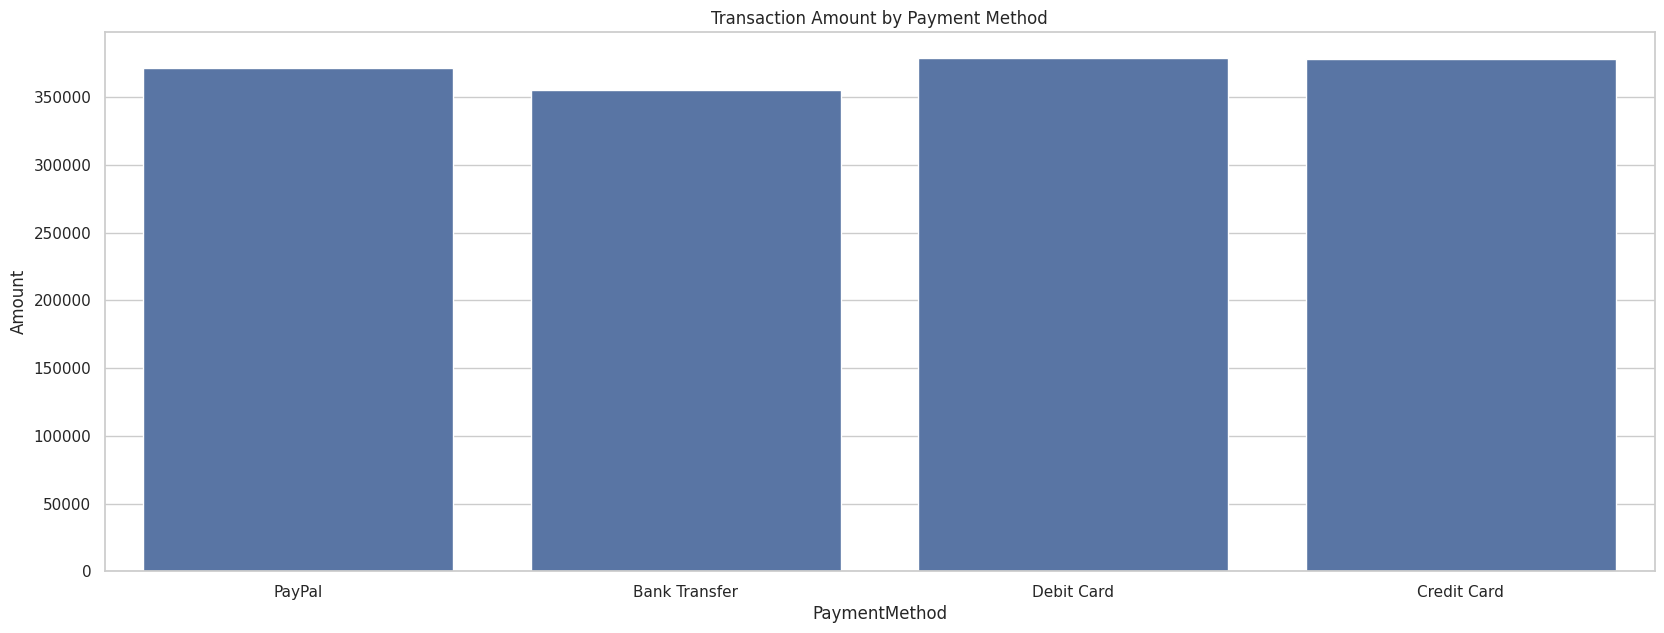

In [140]:
plt.figure(figsize=(20, 7))
sns.barplot(data= cust_tran, x='PaymentMethod', y= 'Amount', estimator=sum, errorbar=None)
plt.title('Transaction Amount by Payment Method')
plt.show()

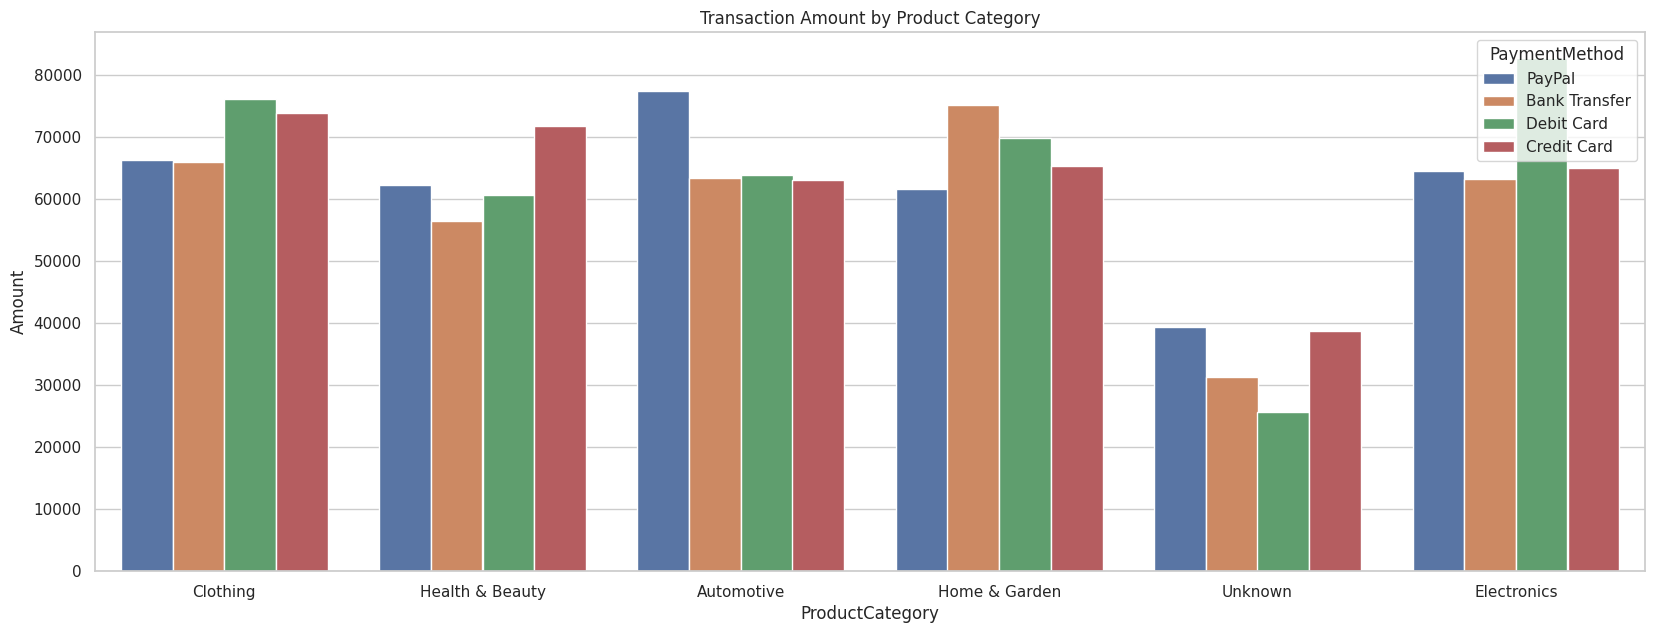

In [141]:
plt.figure(figsize=(20, 7))
sns.barplot(data= cust_tran, x= 'ProductCategory', y= 'Amount' ,hue= 'PaymentMethod', errorbar=None, estimator= 'sum')
plt.title('Transaction Amount by Product Category')
plt.show()

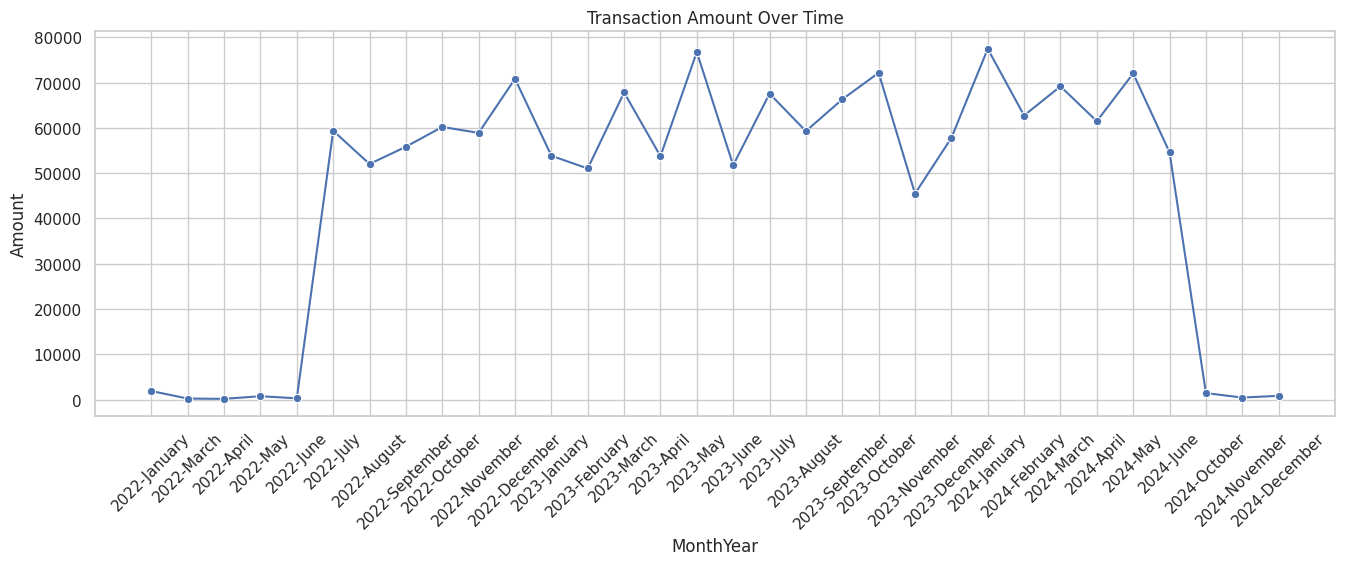

In [142]:
copy= cust_tran.copy()
copy['Year'] = copy['TransactionDate'].dt.year
copy['Month'] = copy['TransactionDate'].dt.month_name()
copy['MonthYear']= copy['Year'].astype(str) + '-' + copy['Month'].astype(str)
copy.sort_values(by= 'TransactionDate', inplace= True)
plt.figure(figsize=(16, 5))
sns.lineplot(data= copy, x= 'MonthYear', y= 'Amount', errorbar=None, estimator= 'sum', marker= 'o')
plt.title('Transaction Amount Over Time')
plt.xticks(rotation= 45)
plt.show()

In [143]:
cust_tran.to_csv('cleaned_customer_transactions.csv', index= False)

## Social Media Interactions

In [144]:
# Loading the Dataset
social_media= pd.read_csv('social_media_interactions_contaminated.csv')
social_media.head(10)

,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,2dcb9523-356b-40b2-a67b-1f27797de261,e5d15761-d0a7-4329-89e3-79a892c56097,2023-07-11,NaN,Comment,NaN
1,e12c37b3-7d4d-472f-9fd8-0df2cb3001aa,02f9f376-70ae-4fcd-9070-1db977939948,2023-07-06,Twitter,Share,NaN
2,08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2,a83fa04c-f109-4f24-8ce1-2078154f6a1c,2024-05-24,Instagram,Comment,Neutral
3,efdfdfc9-5dbb-4478-911a-101a390a0285,28a69c4b-a2e4-4c74-a130-1132d7733fdf,2023-11-01,Instagram,Like,Neutral
4,ca1e90f6-0e5f-492e-ab92-252ff540da18,d9d1c6f8-5e15-4738-b52b-13c2982420cc,2023-07-08,Instagram,Like,NaN
5,3e44871b-f56c-4576-b1ca-d1dc999e2166,0c409883-8396-48e4-83fb-887329848696,2023-12-18,Instagram,Comment,Positive
6,aa5eea4b-c948-41f4-9285-229a470002aa,4034dadf-6541-40d6-a7f0-16b20a009c04,2023-11-15,Instagram,Share,Positive
7,7d83304d-2501-4c9f-ba63-a1a14343e51f,bcfc43e7-c5aa-4dbd-9961-0e108784b199,2024-03-29,Instagram,Comment,NaN
8,bd90f5cb-05a7-40f4-acb1-eedf48b58ffa,d2a06664-703d-4bc1-9401-a06f8c43fda5,2024-05-02,NaN,Like,Neutral
9,63ee220c-19ae-4113-b45c-276b22b068e1,67cdfb0b-3da6-46b8-a1f4-03b2abc81f58,2023-11-18,NaN,Comment,Positive


In [145]:
social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3200 non-null   object
 1   InteractionID    3200 non-null   object
 2   InteractionDate  3200 non-null   object
 3   Platform         2889 non-null   object
 4   InteractionType  3200 non-null   object
 5   Sentiment        2871 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB


In [146]:
# Dropping duplicates
social_media.drop_duplicates(inplace=True)

In [147]:
# Replacing null values with 'Other'
social_media['Platform']= social_media['Platform'].fillna('Other')

# Converting to Datetime datatype
social_media['InteractionDate'] = pd.to_datetime(social_media['InteractionDate'], format= 'mixed')

**Descriptive Statistics**

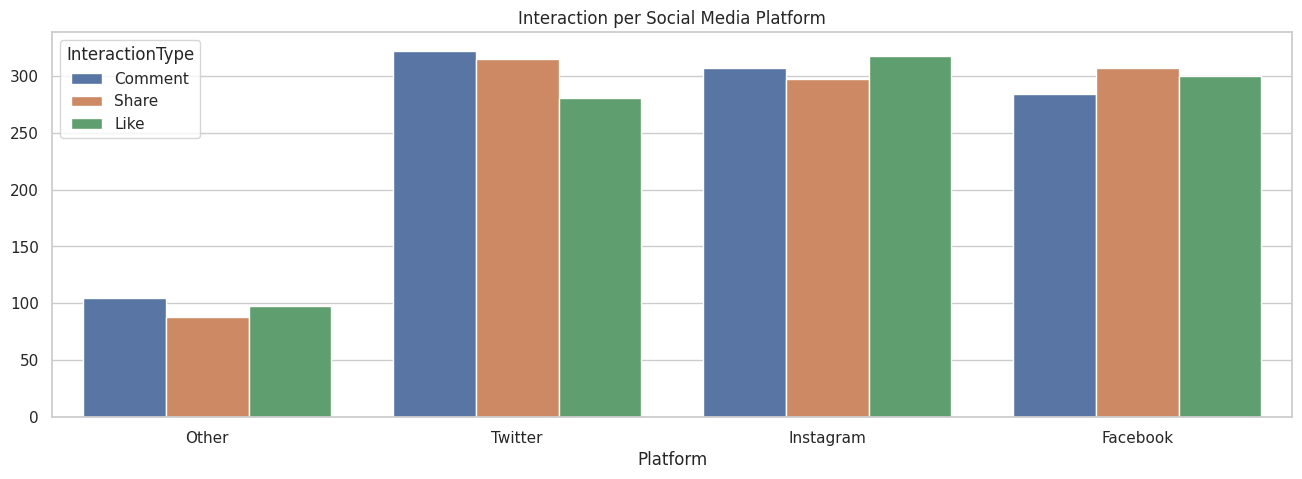

In [148]:
plt.figure(figsize=(16, 5))
sns.countplot(data= social_media, x= 'Platform', hue= 'InteractionType')
plt.title('Interaction per Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('')
plt.show()

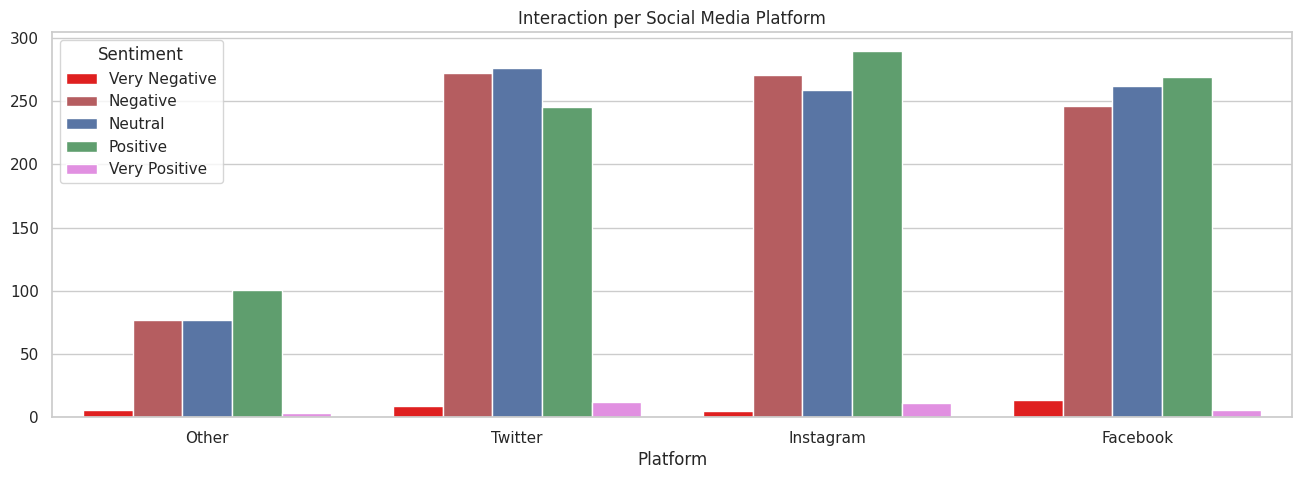

In [149]:
plt.figure(figsize=(16, 5))
sns.countplot(data= social_media, x= 'Platform', hue= 'Sentiment', palette= {'Neutral': 'b', 'Positive': 'g', 'Negative': 'r', 'Very Negative': 'red', 'Very Positive': 'violet'}, hue_order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
plt.title('Interaction per Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('')
plt.show()

In [150]:
social_media.to_csv('cleaned_social_media_interactions.csv', index= False)